In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

## Part 1. Visualize Distribution of ROUGE scores for each method

In [2]:
def draw_rouge_hist(scores: np.ndarray, avg_score: float, item: str,
                    print_y_label=False):
    plt.hist(scores, bins=[0.1*i for i in range(11)],
            weights=np.ones(len(scores))/len(scores))
    plt.axvline(x=avg_score, ls='--', lw=2, c='black',
                label=f'avg={avg_score:.2f}')
    plt.legend()
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
    plt.xlim(0, 1)
    plt.xticks([0.1*i for i in range(11)])
    plt.xlabel(f'{item} score')
    if print_y_label: plt.ylabel('Percentage of samples')

In [3]:
def visualize_rouge_scores(results_path: str, output_path: str):
    results = pd.read_csv(results_path)
    rouge1_f1 = results['rogue1_f1']
    rouge2_f1 = results['rogue2_f1']
    rougeL_f1 = results['rogueL_f1']
    avg_rouge1_f1 = rouge1_f1.mean()
    avg_rouge2_f1 = rouge2_f1.mean()
    avg_rougeL_f1 = rougeL_f1.mean()

    plt.figure(figsize=(15, 4))
    # ROUGE-1 histogram
    plt.subplot(1, 3, 1)
    draw_rouge_hist(scores=rouge1_f1, avg_score=avg_rouge1_f1, item='ROUGE-1',
                    print_y_label=True)

    # ROUGE-2 histogram
    plt.subplot(1, 3, 2)
    draw_rouge_hist(scores=rouge2_f1, avg_score=avg_rouge2_f1, item='ROUGE-2')

    # ROUGE-L histogram
    plt.subplot(1, 3, 3)
    draw_rouge_hist(scores=rougeL_f1, avg_score=avg_rougeL_f1, item='ROUGE-L')

    plt.savefig(fname=output_path, transparent=False, dpi='figure',
                bbox_inches='tight')
    plt.show()

### Extractive Summerization

#### Method 1. TF-IDF summerization

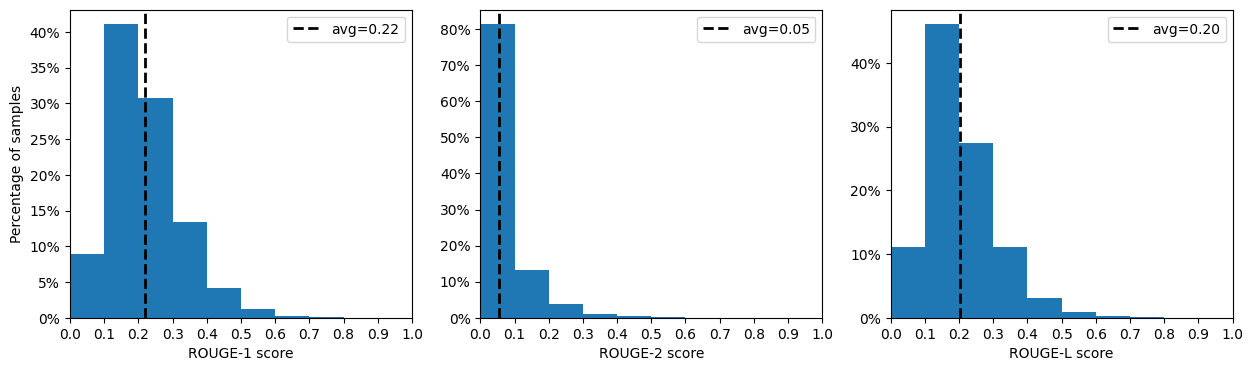

In [4]:
method1_results_path = './results/method1-baseline/TFIDFsum.csv'
output_path = './results/images/histograms/TFIDFsum.png'
visualize_rouge_scores(results_path=method1_results_path,
                       output_path=output_path)

#### Method 2. BERTsum

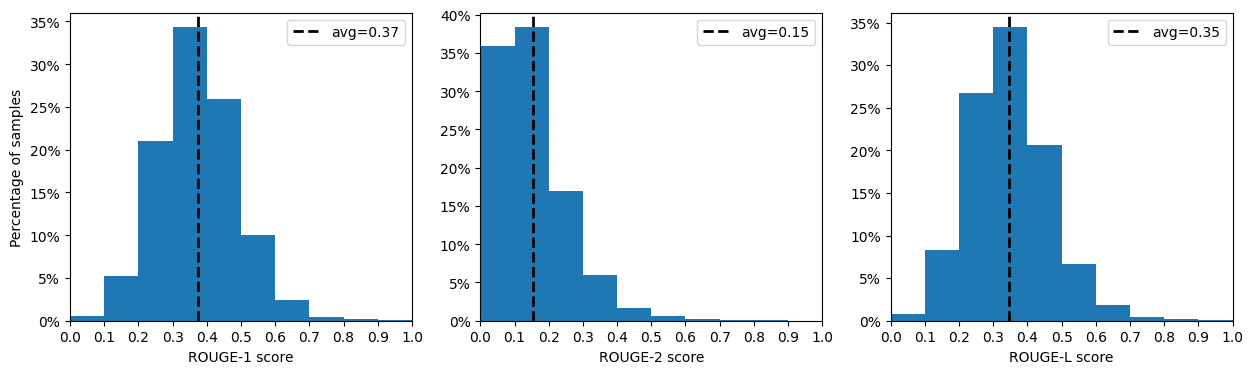

In [6]:
method2_results_path = './results/method2-BERTsum/BERTsum.csv'
output_path = './results/images/histograms/BERTsum.png'
visualize_rouge_scores(results_path=method2_results_path,
                       output_path=output_path)

### Abstractive Summerization

#### Method 3-1. BART-CNN

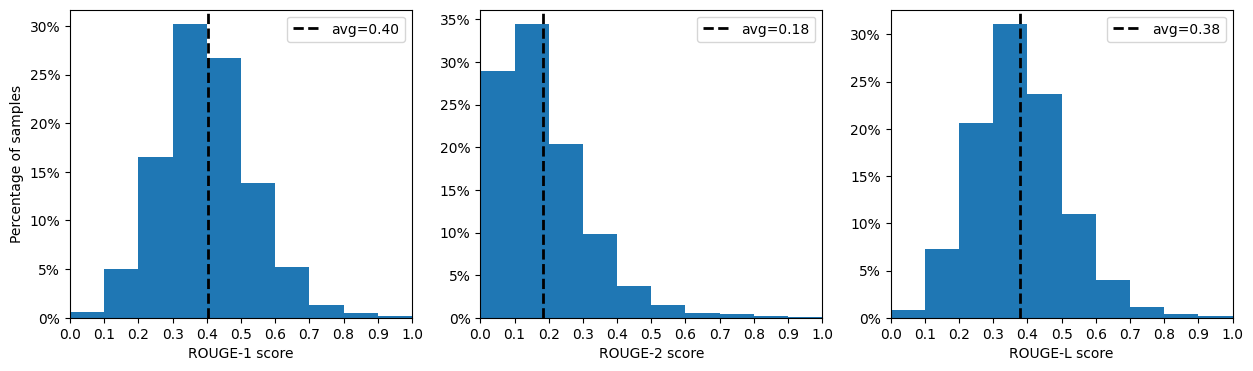

In [7]:
bart_results_path = './results/method3-bart-large-cnn/bart-large-cnn_summary.csv'
output_path = './results/images/histograms/bart-large.png'
visualize_rouge_scores(results_path=bart_results_path,
                       output_path=output_path)

#### Method 3-2-1. T5-small

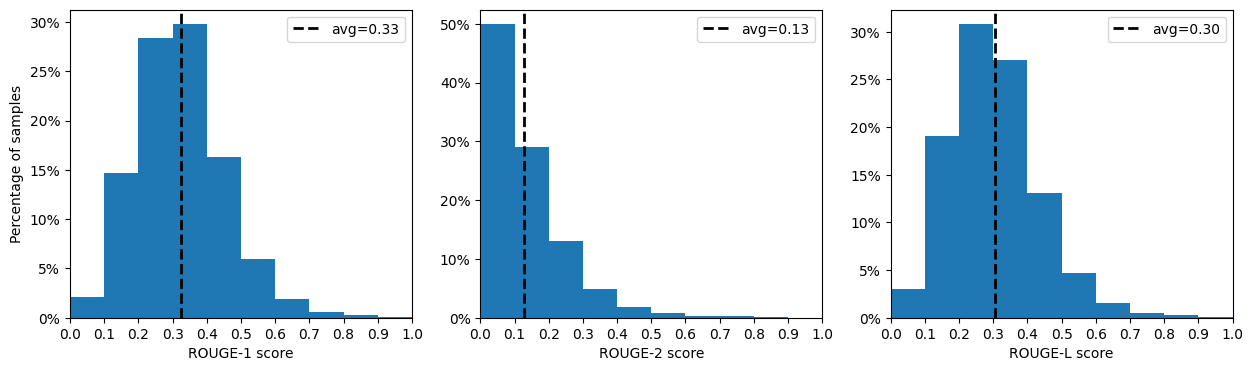

In [8]:
t5_results_path = './results/method3-t5-small/t5-small_summary.csv'
output_path = './results/images/histograms/t5-small.png'
visualize_rouge_scores(results_path=t5_results_path,
                       output_path=output_path)

#### Method 3-2-2. T5-small with auto tokenizer

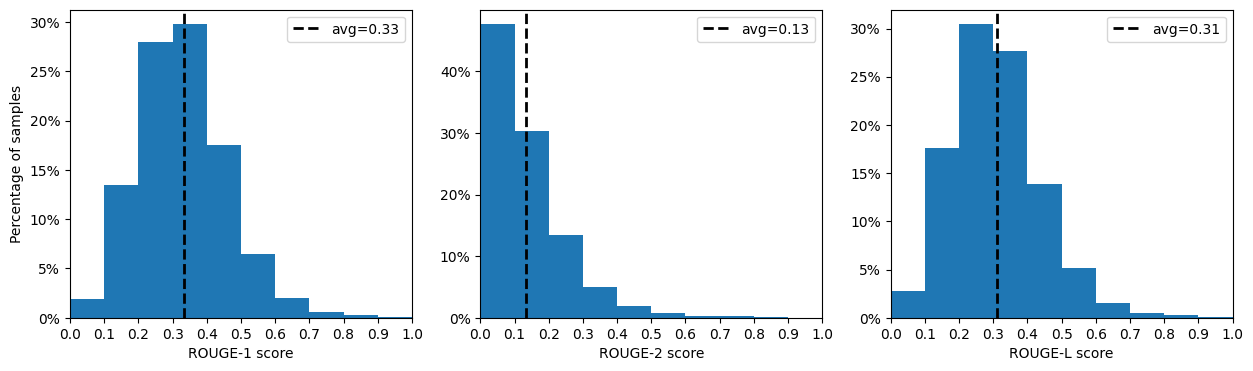

In [9]:
t5_auto_results_path = './results/method3-t5-small/t5-small_summary_auto_tokenizer.csv'
output_path = './results/images/histograms/t5-small-auto.png'
visualize_rouge_scores(results_path=t5_auto_results_path,
                       output_path=output_path)

#### Method 3-2-3. T5-small with fine-tuning

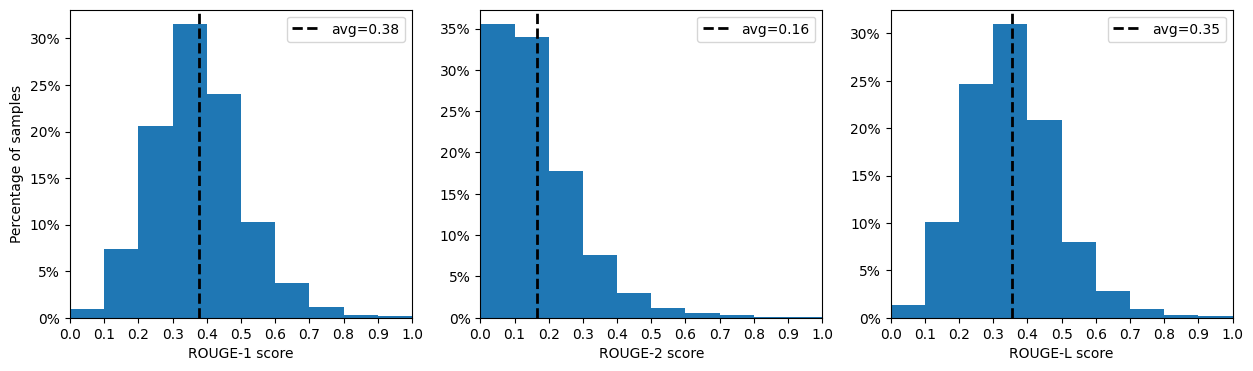

In [10]:
t5_locally_results_path = './results/method3-t5-small/t5-small_trained_locally_True_summary.csv'
output_path = './results/images/histograms/t5-small-locally.png'
visualize_rouge_scores(results_path=t5_locally_results_path,
                       output_path=output_path)

## Part 2. Compare Different Summarizers

In [11]:
def get_svg_rouge_scores(results_path: str) -> list[float]:
    results = pd.read_csv(results_path)
    rouge1_f1 = results['rogue1_f1']
    rouge2_f1 = results['rogue2_f1']
    rougeL_f1 = results['rogueL_f1']
    avg_rouge1_f1 = rouge1_f1.mean()
    avg_rouge2_f1 = rouge2_f1.mean()
    avg_rougeL_f1 = rougeL_f1.mean()

    return [avg_rouge1_f1, avg_rouge2_f1, avg_rougeL_f1]

In [12]:
method1_avg_scores = get_svg_rouge_scores(method1_results_path)
method2_avg_scores = get_svg_rouge_scores(method2_results_path)
method3_bart_avg_scores = get_svg_rouge_scores(bart_results_path)
method3_t5_avg_scores = get_svg_rouge_scores(t5_locally_results_path)

In [13]:
all_avg_scores = [method1_avg_scores, method2_avg_scores,
                  method3_t5_avg_scores, method3_bart_avg_scores]

methods = ['method1 (TF-IDF)', 'method2 (BERTsum)',
           'method3-1 (T5-small)', 'method3-2 (BART)']

aggreated_df = pd.DataFrame(columns=['method', 'ROUGE_type', 'avg_score'])

for scores, method in zip(all_avg_scores, methods):
    df = pd.DataFrame(columns=['method', 'ROUGE_type', 'avg_score'])
    df['method'] = [method for i in range(len(scores))]
    df['ROUGE_type'] = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
    df['avg_score'] = scores
    aggreated_df = pd.concat([aggreated_df if not aggreated_df.empty else None, df], axis=0)

In [14]:
aggreated_df

,method,ROUGE_type,avg_score
0,method1 (TF-IDF),ROUGE-1,0.219431
1,method1 (TF-IDF),ROUGE-2,0.054161
2,method1 (TF-IDF),ROUGE-L,0.203957
0,method2 (BERTsum),ROUGE-1,0.374507
1,method2 (BERTsum),ROUGE-2,0.152654
2,method2 (BERTsum),ROUGE-L,0.347360
0,method3-1 (T5-small),ROUGE-1,0.376444
1,method3-1 (T5-small),ROUGE-2,0.164647
2,method3-1 (T5-small),ROUGE-L,0.354411
0,method3-2 (BART),ROUGE-1,0.402406


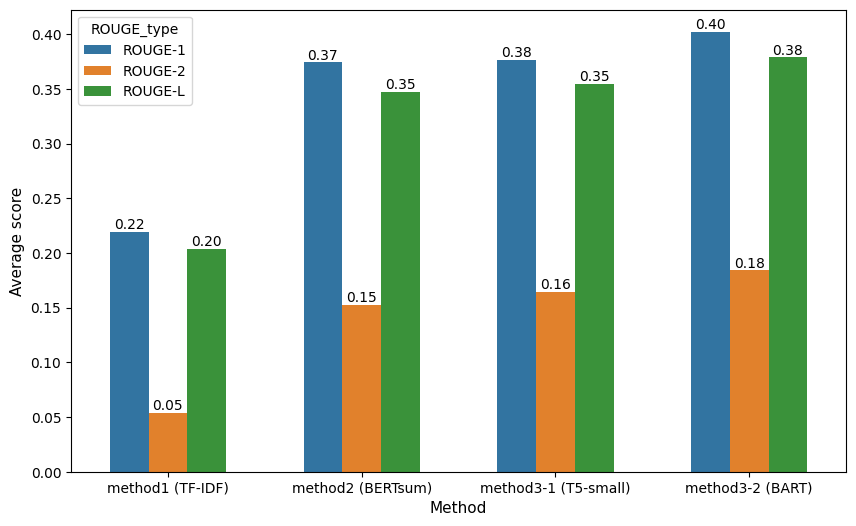

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="method", hue="ROUGE_type", y="avg_score", data=aggreated_df,
                 width=0.6)
for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f')

ax.set_xlabel('Method', fontsize=11)
ax.set_ylabel('Average score', fontsize=11)

plt.savefig('./results/images/barplot/comparison.png')
plt.show()